In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 7s 0us/step


In [12]:
def prepare_image(file):
    img_path = 'assets/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

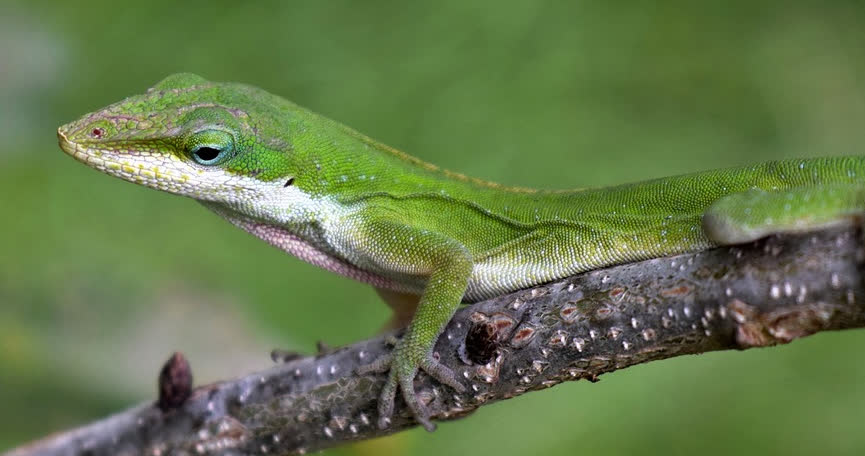

In [13]:
from IPython.display import Image
Image(filename='assets/test_image_1.jpg', width=800,height=450) 

In [14]:
preprocessed_image = prepare_image('test_image_1.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)

40960/35363 [==================================] - 0s 2us/step


In [20]:
for i in results[0]:
    print(i)

('n01682714', 'American_chameleon', 0.6527469)
('n01693334', 'green_lizard', 0.18943301)
('n01687978', 'agama', 0.13799655)
('n01689811', 'alligator_lizard', 0.013600819)
('n01688243', 'frilled_lizard', 0.0043153027)


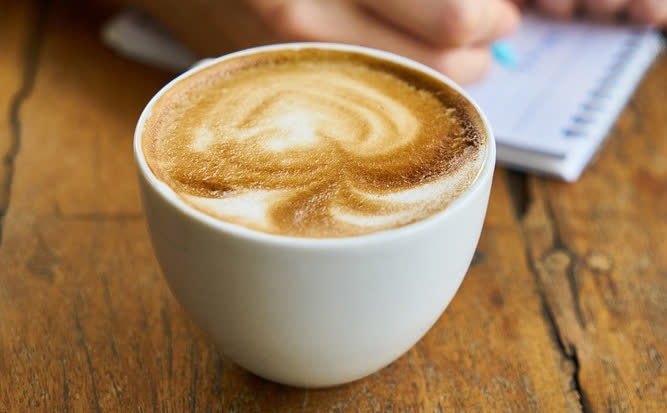

In [25]:
from IPython.display import Image
Image(filename='assets/test_image_2.jpg', width=800,height=450) 

In [21]:
preprocessed_image = prepare_image('test_image_2.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)

In [22]:
for i in results[0]:
    print(i)

('n07920052', 'espresso', 0.9766625)
('n07930864', 'cup', 0.0100934915)
('n07932039', 'eggnog', 0.00859704)
('n03063599', 'coffee_mug', 0.0036651783)
('n04597913', 'wooden_spoon', 0.0004963663)


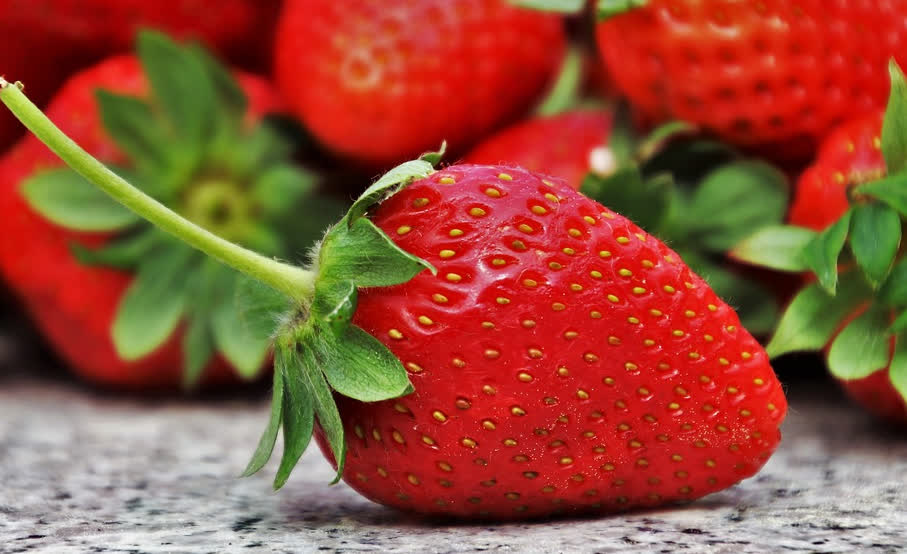

In [26]:
from IPython.display import Image
Image(filename='assets/test_image_3.jpg', width=800,height=450) 

In [23]:
preprocessed_image = prepare_image('test_image_3.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)

In [27]:
for i in results[0]:
    print(i)

('n07745940', 'strawberry', 0.9999938)
('n07749582', 'lemon', 1.2442e-06)
('n07747607', 'orange', 8.602375e-07)
('n07753275', 'pineapple', 8.278158e-07)
('n07768694', 'pomegranate', 6.2610115e-07)


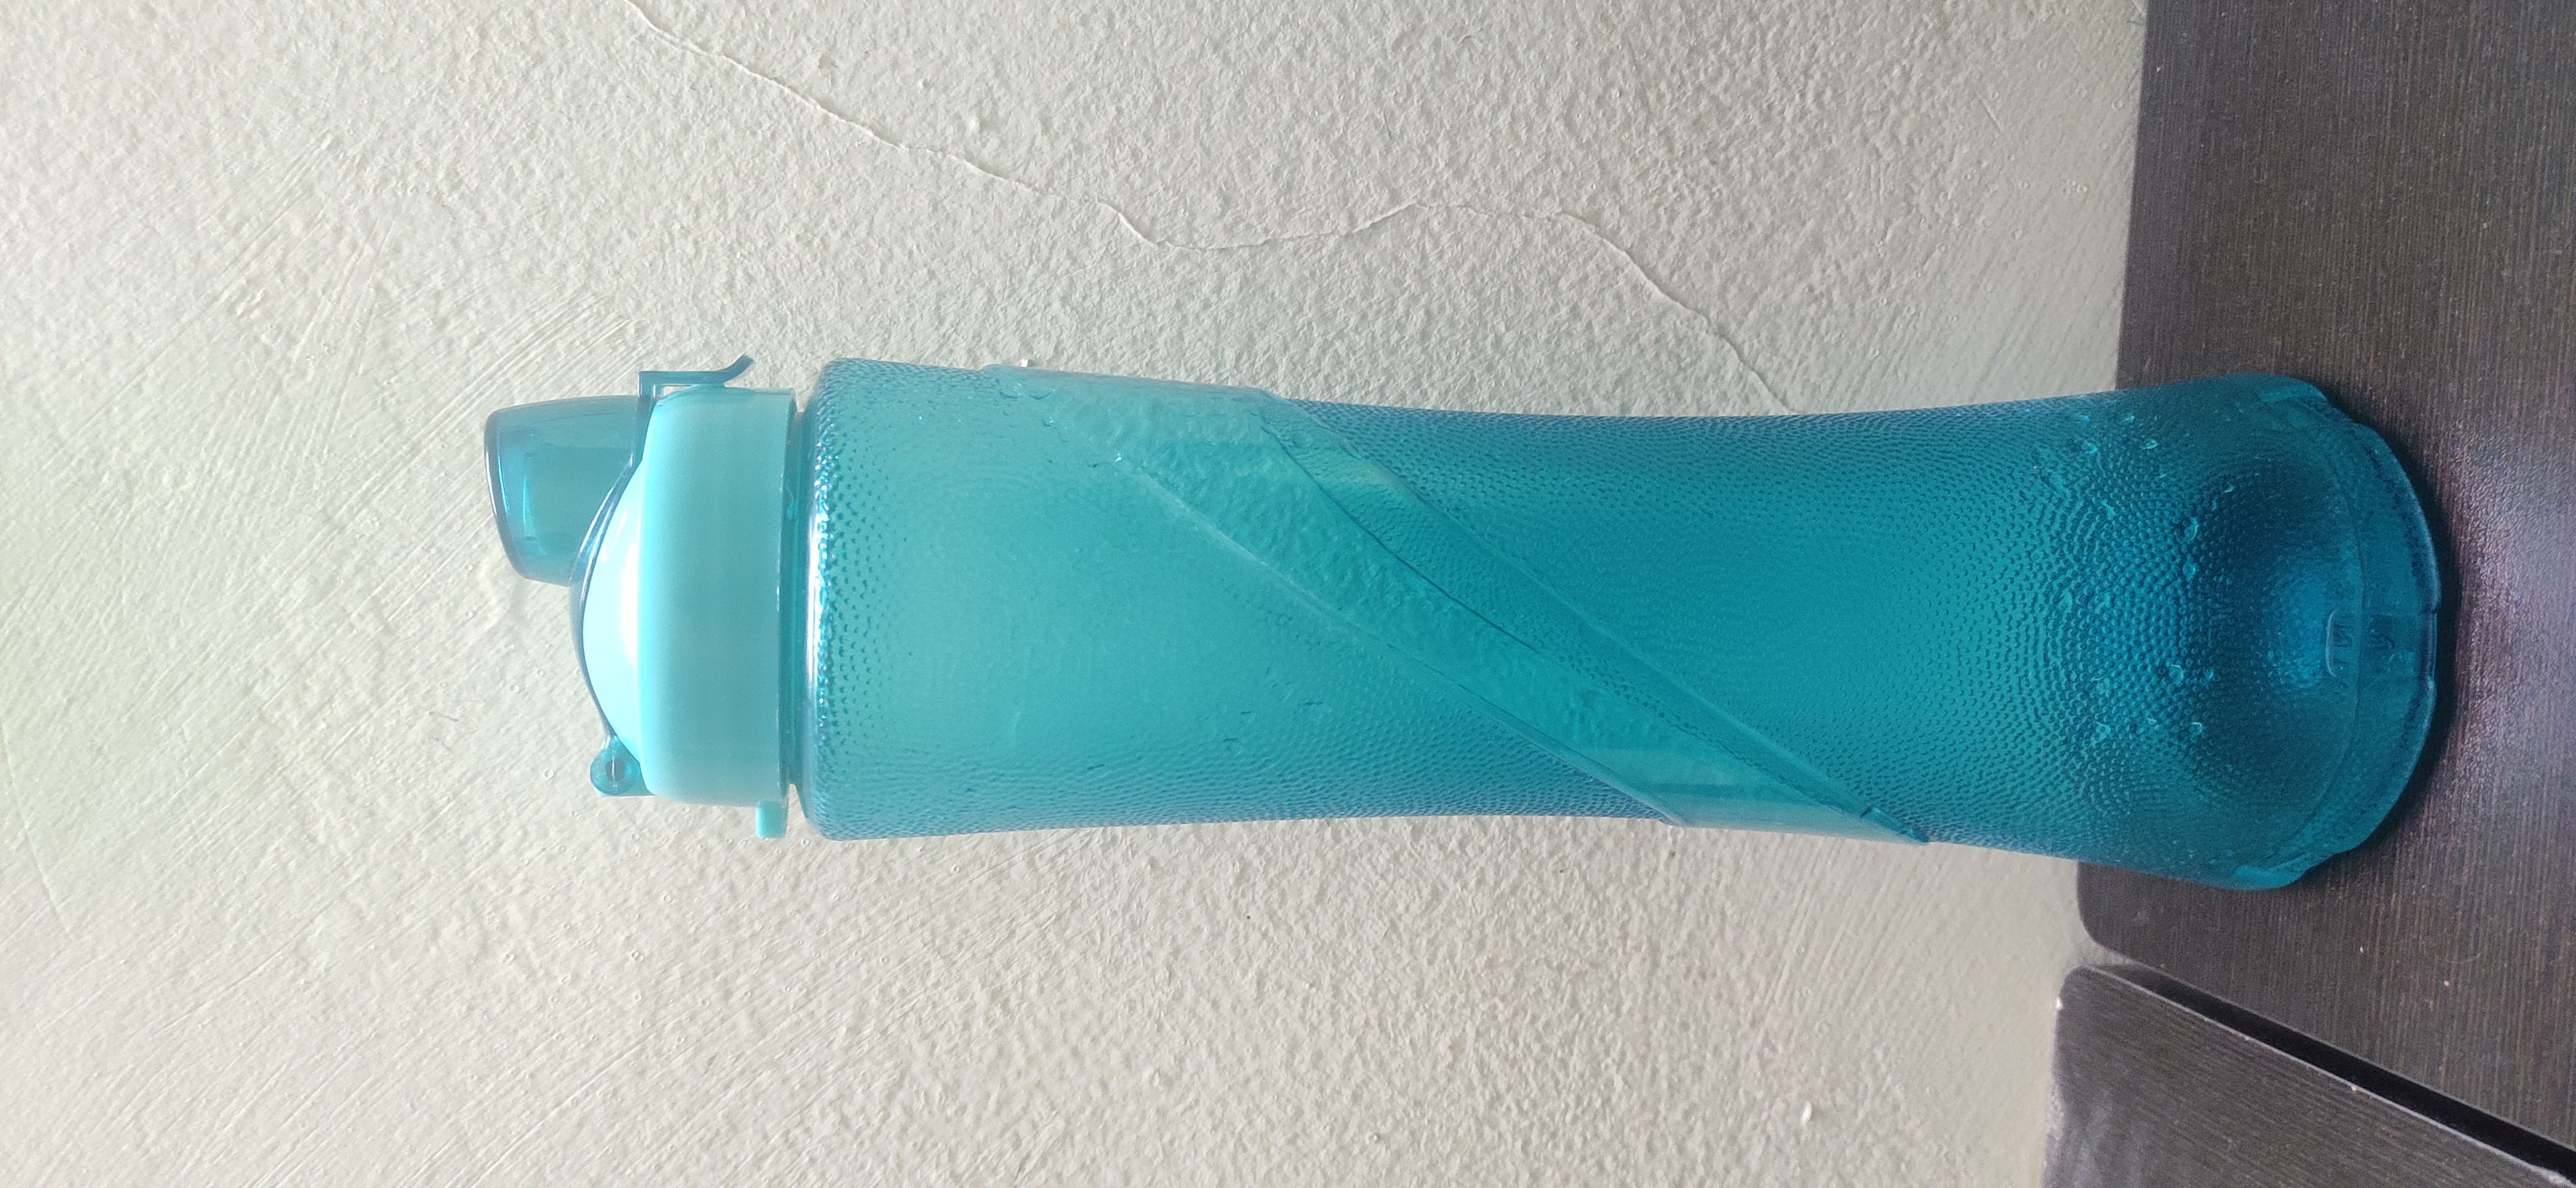

In [29]:
from IPython.display import Image
Image(filename='assets/test_image_4.jpg', width=450,height=800)

In [30]:
preprocessed_image = prepare_image('test_image_4.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)

In [31]:
for i in results[0]:
    print(i)

('n04557648', 'water_bottle', 0.26099762)
('n04367480', 'swab', 0.1262297)
('n02808304', 'bath_towel', 0.09401848)
('n03026506', 'Christmas_stocking', 0.053462785)
('n03623198', 'knee_pad', 0.0415299)
